In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\accident.csv")
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27,No,No,1
1,69,Female,46,No,Yes,1
2,46,Male,46,Yes,Yes,0
3,32,Male,117,No,Yes,0
4,60,Female,40,Yes,Yes,0


In [3]:
data.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [4]:
data.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,200.000000,200.00000
mean,43.42500,70.345000,0.50500
std,14.94191,29.936549,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


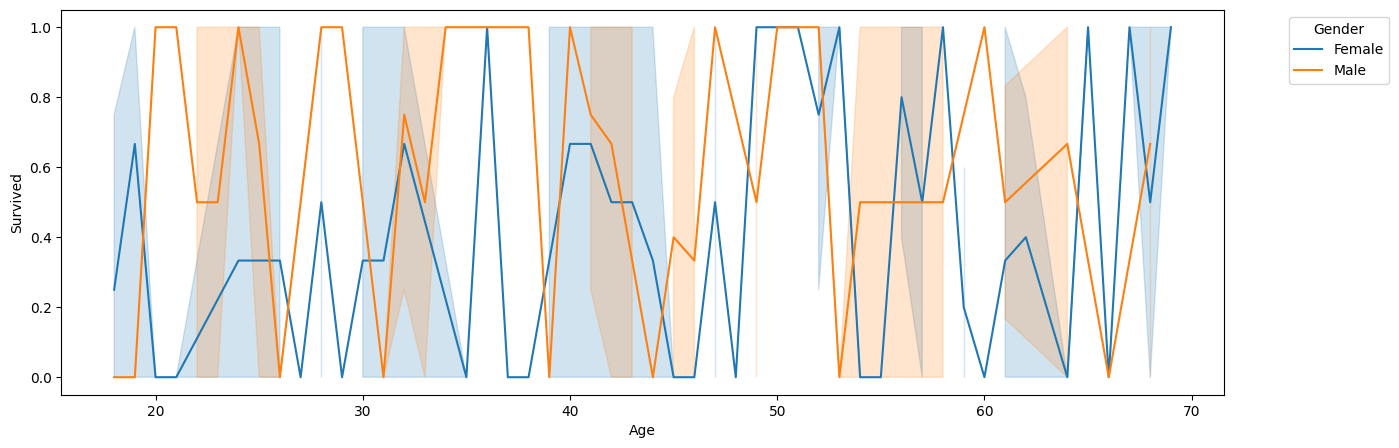

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Age",y="Survived",hue="Gender",data=data)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

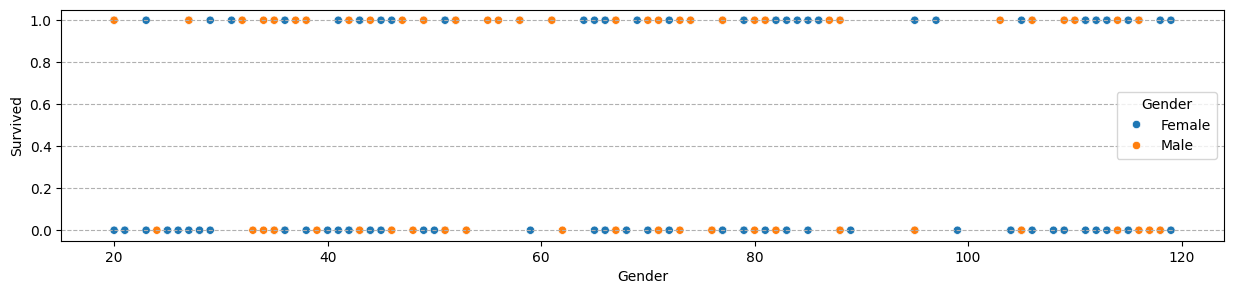

In [ ]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="Speed_of_Impact",y="Survived",hue="Gender",data=data)
plt.grid(linestyle='--', axis='y')
plt.xlabel("Speed of Impact")
plt.ylabel("Survived")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_29160\1055959912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], data=data, palette='BrBG')


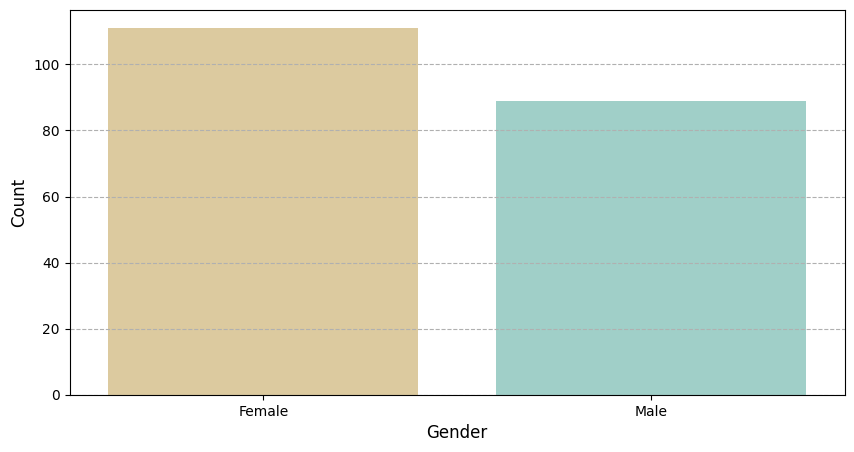

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Gender'], data=data, palette='BrBG')
plt.grid(linestyle='--', axis='y')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [8]:
cat_col=["Seatbelt_Used","Speed_of_impact","gender"]
for col in data:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

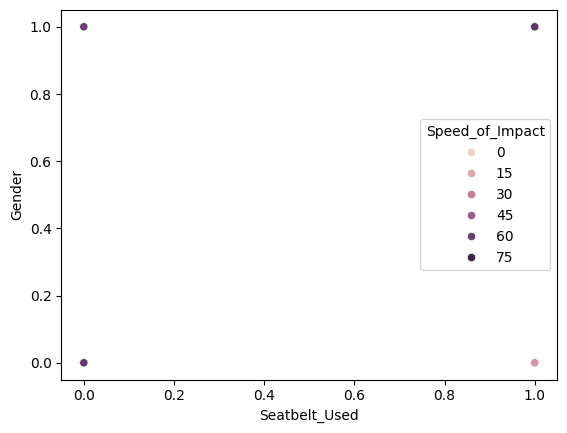

In [9]:
sns.scatterplot(x="Seatbelt_Used",y="Gender",hue="Speed_of_Impact",data=data)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_29160\4218747440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], data=data, palette='BrBG')


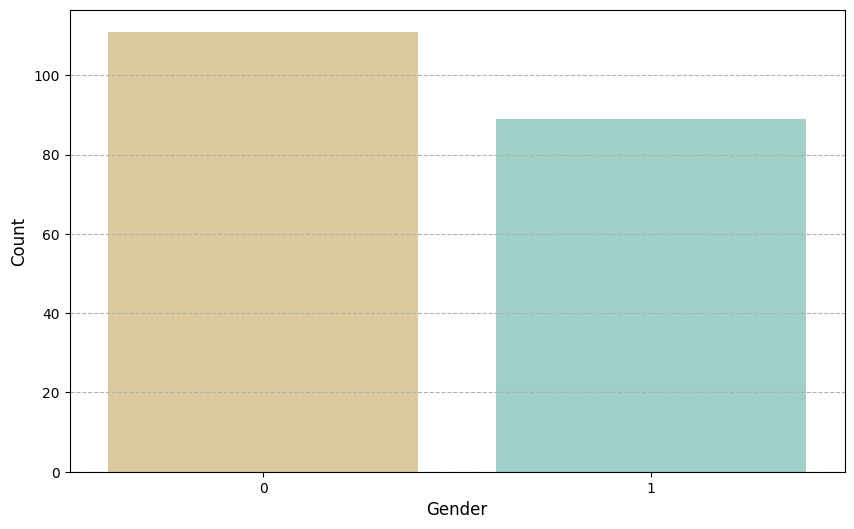

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Gender'], data=data, palette='BrBG')
plt.grid(linestyle='--', axis='y')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [11]:
x=data.drop(columns=["Survived"])
y=data["Survived"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [13]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [14]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(52.5, 56.25)

In [15]:
r=RandomForestClassifier(n_estimators=100,criterion="gini")
r.fit(x_train,y_train)
r.score(x_test,y_test)*100,r.score(x_train,y_train)*100

(45.0, 100.0)

In [16]:
dt=DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(52.5, 62.5)

In [17]:
lr.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [18]:
y_test

95     1
15     0
30     0
158    0
128    1
115    1
69     0
170    0
174    0
45     0
66     1
182    1
165    0
78     0
186    0
177    0
56     0
152    1
82     1
68     0
124    0
16     0
148    1
93     1
65     1
60     0
84     1
67     1
125    0
132    1
9      1
18     1
55     0
75     1
150    1
104    0
135    0
137    1
164    0
76     0
Name: Survived, dtype: int64

In [ ]:
prediction=[]
for i in lr.predict(x_test):
    for j in y_test:
        if i==j:
            prediction.append("True")
        else:
            prediction.append("False")
print(prediction)
count_f=0
count_t=0
for i  in prediction:
    if i=="False":
        count_f+=1
for i in prediction:
    if i=="True":
        count_t+=1
print(count_f,count_t)

['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True',